#### Python 爬取 201865 条《隐秘的角落》弹幕数据，发现看剧不如爬山？
首发于公众号【凹凸数据】，仅供学习交流，转载须获得授权

## 数据分析

In [2]:
# 导包
import pandas as pd
import numpy as np
import re
import jieba
import pyecharts

In [5]:
# 读入数据
df_all = pd.read_csv("danmu2.csv", header= 0,index_col=0,encoding='utf-8-sig')
df = df_all.copy()

# 重置索引
df = df.reset_index(drop=True)
df.head()

,tv_name,uid,contentsId,contents,likeCount
0,第01集,1354611638,1592838562920007156,二刷的朋友有吗,19
1,第01集,1290387715,1592308702474009744,良心啊，一小时,78
2,第01集,1304178541,1592317555873002245,基本都好,9
3,第01集,1791773843,1593139392541001130,带你们去爬山,2
4,第01集,1581452867,1593150522156003497,这孩子演技很不错啊,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201865 entries, 0 to 201864
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   tv_name     201865 non-null  object
 1   uid         201865 non-null  int64 
 2   contentsId  201865 non-null  int64 
 3   contents    201865 non-null  object
 4   likeCount   201865 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 7.7+ MB


### 弹幕发射器

In [4]:
#累计发送弹幕数的用户
danmu_counts = df.groupby('uid')['contentsId'].count().sort_values(ascending = False).reset_index()
danmu_counts.columns = ['用户id','累计发送弹幕数']
danmu_counts.head()

,用户id,累计发送弹幕数
0,1810351987,2561
1,1319063154,146
2,2244033948,131
3,2407948956,106
4,1488898523,104


In [5]:
df_top1 = df[df['uid'] == 1810351987].sort_values(by="likeCount",ascending = False).reset_index()
df_top1.head(10)

,index,tv_name,uid,contentsId,contents,likeCount
0,48926,第03集,1810351987,1592396281667005291,感觉晶晶有点自作自受,125
1,18370,第01集,1810351987,1592310435456006922,真的不能忽视了，心理健康,96
2,48276,第03集,1810351987,1592401371493007155,这样的晶晶真的太坏了,94
3,52807,第03集,1810351987,1592398904483005951,善恶永远都在一瞬间的,81
4,97350,第06集,1810351987,1592483605611004816,哈哈，姜还是老的辣呀,81
5,53405,第03集,1810351987,1592399003845007165,还是认为晶晶真的好任性,77
6,71351,第04集,1810351987,1592398032950002734,哈哈哈哈张东升好机智,74
7,78328,第05集,1810351987,1592483501326004084,总感觉王瑶也太狠了吧,73
8,71459,第04集,1810351987,1592401777744000259,老陈对严良真的太好了吧,70
9,65411,第04集,1810351987,1592396346696002728,朱永平只关心他的女儿,66


In [6]:
data_top1 = df_top1.groupby('tv_name')['contentsId'].count()

In [7]:
from pyecharts.charts import Bar
from pyecharts import options as opts 

bar0 = Bar(init_opts=opts.InitOpts(width='960px', height='500px')) 
bar0.add_xaxis(data_top1.index.tolist())
bar0.add_yaxis("",data_top1.values.tolist()) 
bar0.set_global_opts(title_opts=opts.TitleOpts(title='弹幕发射器')) 
bar0.set_series_opts(
        label_opts=opts.LabelOpts(is_show=False),
        markline_opts=opts.MarkLineOpts(
            data=[opts.MarkLineItem(y=213.4, name="yAxis=213.4")]
        ))
bar0.render_notebook()

### 这些弹幕大家都认同

In [8]:
df.head()

,tv_name,uid,contentsId,contents,likeCount
0,第01集,1354611638,1592838562920007156,二刷的朋友有吗,19
1,第01集,1290387715,1592308702474009744,良心啊，一小时,78
2,第01集,1304178541,1592317555873002245,基本都好,9
3,第01集,1791773843,1593139392541001130,带你们去爬山,2
4,第01集,1581452867,1593150522156003497,这孩子演技很不错啊,0


In [9]:
df_like = df[df.groupby(['tv_name'])['likeCount'].rank(method="first", ascending=False)==1].reset_index()[['tv_name','contents','likeCount']]
df_like.columns = ['剧集','弹幕','赞']
df_like

,剧集,弹幕,赞
0,第01集,秦昊：爬山吗？一秒下山的那种,8305
1,第02集,喊一句你大爷的试试,8889
2,第03集,快吗？我待会还要收尸耶,8526
3,第04集,好秃然啊,8451
4,第05集,她才6岁就这么坏,8472
5,第06集,我还有机会嘛＝你还想活嘛,7452
6,第07集,爸爸觉得老师有问题？,3387
7,第08集,哈哈哈哈哈哈，气势汹汹，回首掏，板砖一收，走位走位，看不见看不见,5601
8,第09集,升哥你也敢打，分分钟干死你,4533
9,第10集,妈，我怕实话实说吓死你,4521


### 朝阳东升

In [10]:
a = {'张东升':'东升|秦昊|张老师', 
     '朱朝阳':'朝阳', 
     '严良':'严良', 
     '普普':'普普', 
     '朱永平':'朱永平', 
     '周春红':'春红|大娘子', 
     '王瑶':'王瑶', 
     '徐静':'徐静|黄米依', 
     '陈冠声':'王景春|老陈|陈冠声', 
     '叶军':'叶军|皮卡皮卡', 
     '马主任':'主任|老马', 
     '朱晶晶':'晶晶',
     '叶驰敏':'叶驰敏'}
for key, value in a.items():
    df[key] = df['contents'].str.contains(value)
staff_count = pd.Series({key: df.loc[df[key], 'contentsId'].count() for key in a.keys()}).sort_values()
print(staff_count)

马主任       2
朱朝阳      22
叶军       47
徐静       99
叶驰敏     125
朱永平     153
周春红     583
朱晶晶     818
王瑶     1462
陈冠声    1942
严良     5075
普普     5188
张东升    5734
dtype: int64


In [11]:
from pyecharts import options as opts
from pyecharts.charts import Polar
a = ['朱朝阳','叶军','徐静','叶驰敏','朱永平','周春红','朱晶晶','王瑶','陈冠声','严良','普普','张东升']
b = [22,47,99,125,153,583,818,1462,1942,5075,5188,5734]
Polar = Polar(init_opts=opts.InitOpts(width='960px', height='500px')) 

Polar.add_schema(angleaxis_opts=opts.AngleAxisOpts(data=a, type_= "category"))
Polar.add("", b, type_="bar")
Polar.set_global_opts(title_opts=opts.TitleOpts(title="弹幕中提到的主要演员"))
#word1.render("粽子商品名称词云图.html")
Polar.render_notebook()

### 词云

In [12]:
def get_cut_words(content_series):
    # 读入停用词表
    import jieba 
    stop_words = [] 
    
    with open("stop_words.txt", 'r', encoding='utf-8') as f:
        lines = f.readlines()
        for line in lines:
            stop_words.append(line.strip())

    # 添加关键词
    my_words = ['张东升', '一小时', '1小时', '孩子他爸', '孩子他妈', '黄圣依', '无杜华版']      
    for i in my_words:
        jieba.add_word(i) 

    # 自定义停用词
    my_stop_words = ['真是', '一堆',]    
    stop_words.extend(my_stop_words)               

    # 分词
    word_num = jieba.lcut(content_series.str.cat(sep='。'), cut_all=False)

    # 条件筛选
    word_num_selected = [i for i in word_num if i not in stop_words and len(i)>=2]
    
    return word_num_selected

In [13]:
text1 = get_cut_words(content_series=df.contents)
text1[:5] 

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Administrator\AppData\Local\Temp\jieba.cache
Loading model cost 1.111 seconds.
Prefix dict has been built successfully.


['二刷', '朋友', '良心', '一小时', '爬山']

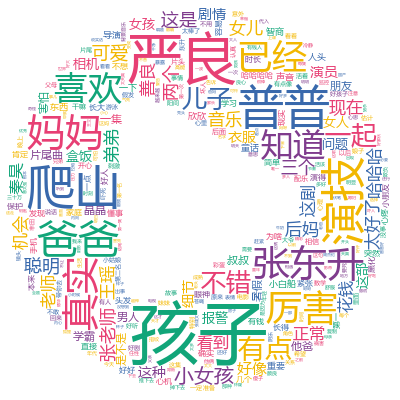

In [14]:
import stylecloud
from IPython.display import Image 

stylecloud.gen_stylecloud(text=' '.join(text1), collocations=False,
                          font_path=r'‪C:\Windows\Fonts\msyh.ttc',
                          icon_name='fas fa-play-circle',size=400,
                          output_name='隐秘的角落-词云.png')
Image(filename='隐秘的角落-词云.png')

## 关注我
![](https://img-blog.csdnimg.cn/20200627014848419.gif)